In [1]:
#Step 1:  Load data into a dataframe
#Step 2:  check the dimension of the table/look at the data
#Display the data
#what type of variables are in the table 
#display length of data
#display publishers (publications)
#display min, max of years published
#display how many articles from each year
#Step 3:  Create some bar charts to show articles
#display bar chart of articles sorted by Publication Name
#display bar chart of articles sorted by counts
#Step 4:  clean text:  no punctuation/all lowercase
#look at mean, min, max article lengths
#Step 5:  remove articles with no words
#Step 6:  Check for Outliers:  show bar graph of outliers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Step 1:  Load data into a dataframe
articles = pd.read_csv('articles1.csv')

In [4]:
#Step 2:  check the dimension of the table/look at the data
articles.shape

(50000, 10)

In [5]:
#Look at the dataframe
articles.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
#what type of variables are in the table 

#Here are the numbered columns (Unnamed, id, year, month and url (since the entire column is Nan))
articles.describe()

,Unnamed: 0,id,year,month,url
count,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,25694.378380,44432.454800,2016.273700,5.508940,NaN
std,15350.143677,15773.615179,0.634694,3.333062,NaN
min,0.000000,17283.000000,2011.000000,1.000000,NaN
25%,12500.750000,31236.750000,2016.000000,3.000000,NaN
50%,25004.500000,43757.500000,2016.000000,5.000000,NaN
75%,38630.250000,57479.250000,2017.000000,8.000000,NaN
max,53291.000000,73469.000000,2017.000000,12.000000,NaN


In [7]:
#Here are the string columns
articles.describe(include='O')

,title,publication,author,date,content
count,50000,50000,43694,50000,50000
unique,49920,5,3603,983,49888
top,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,advertisement
freq,7,23781,1559,221,42


In [8]:
#display length of data
len(articles)

50000

In [9]:
#display publishers (publications)
print(articles.publication.unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic']


In [10]:
#display min, max of years published
text = 'The {} year is {:.0f}'
print(text.format('earliest', articles.year.min()))
print(text.format('latest', articles.year.max()))

The earliest year is 2011
The latest year is 2017


In [11]:
#display how many articles from each year

articles.year.value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

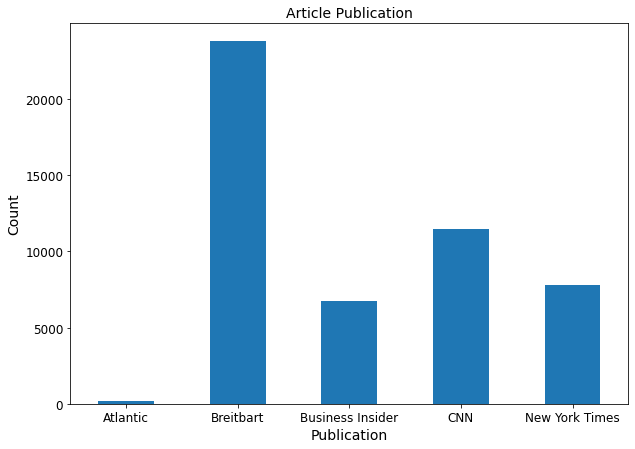

In [12]:
#Step 3:  Create some bar charts to show articles

#display bar chart of articles sorted by Publication Name

ax = articles.publication.value_counts().sort_index().plot(kind='bar', figsize=(10,7))
plt.title('Article Publication', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel('Publication', fontsize=14)
plt.ylabel('Count', fontsize=14);
plt.show()


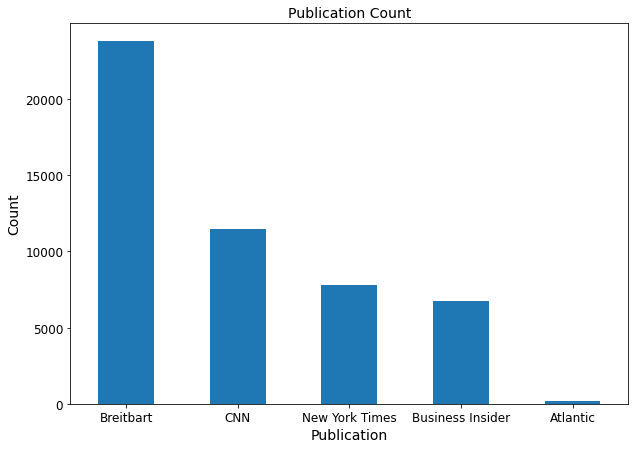

In [13]:
#display bar chart of articles sorted by counts
ax = articles.publication.value_counts().plot(kind='bar', figsize=(10,7))
plt.title('Publication Count', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel('Publication', fontsize=14)
plt.ylabel('Count', fontsize=14);
plt.show()


In [14]:
#Step 4:  clean text:  no punctuation/all lowercase
#Make our new column to work on
articles['cleaned'] = articles.content.astype(str)

In [15]:
#Lower case all the words in the articles
articles['cleaned'] = articles['cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
#Remove all the punctuation
articles['cleaned'] = articles['cleaned'].str.replace('[^\w\s]','')

In [17]:
#look at mean, min, max article lengths

#Create a number of words column
articles['Number of Words'] = articles['cleaned'].apply(lambda x: len(x.split()))

print('Mean words in articles: ' + str(articles['Number of Words'].mean()))
print('Minimum words in articles: ' + str(articles['Number of Words'].min()))
print('Maximum words in articles: ' + str(articles['Number of Words'].max()))

Mean words in articles: 636.29456
Minimum words in articles: 0
Maximum words in articles: 24735


In [18]:
#Step 5:  remove articles with no words. There are only 65
articles = articles[articles['Number of Words'] > 0]

In [19]:
#Printing out the new mean and minimum which is... 1. The word advertisement.
print('New mean: ' + str(articles['Number of Words'].mean()))
print('New minimum: ' + str(articles['Number of Words'].min()))

New mean: 637.1228196655652
New minimum: 1


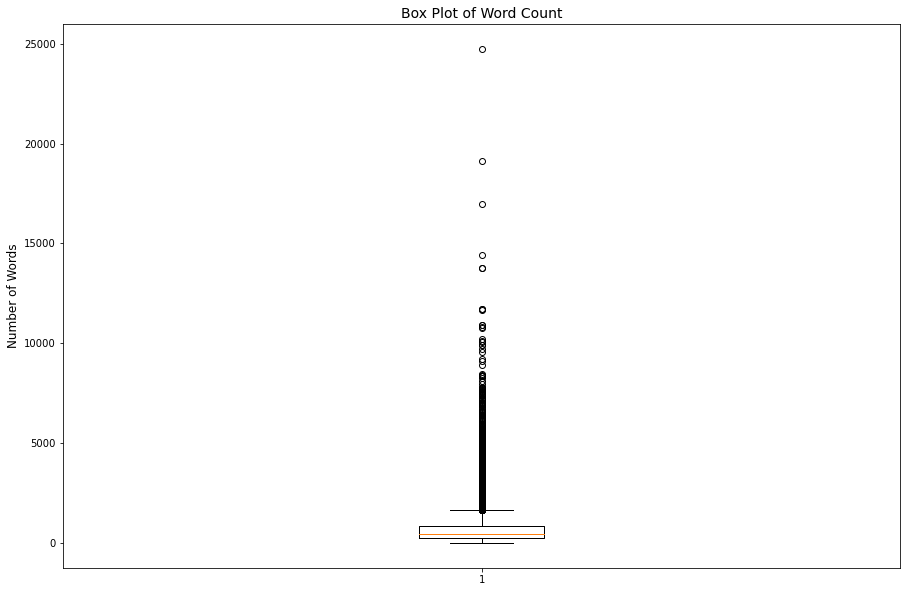

In [20]:
#Step 6:  Check for Outliers:  show bar graph of outliers

#First we will plot a bowplot to visualize the outliers. Looks like we have lots
plt.figure(figsize=(15,10))
plt.boxplot(articles['Number of Words'])
plt.ylabel('Number of Words', fontsize=12)
plt.title('Box Plot of Word Count', fontsize=14)
plt.show()

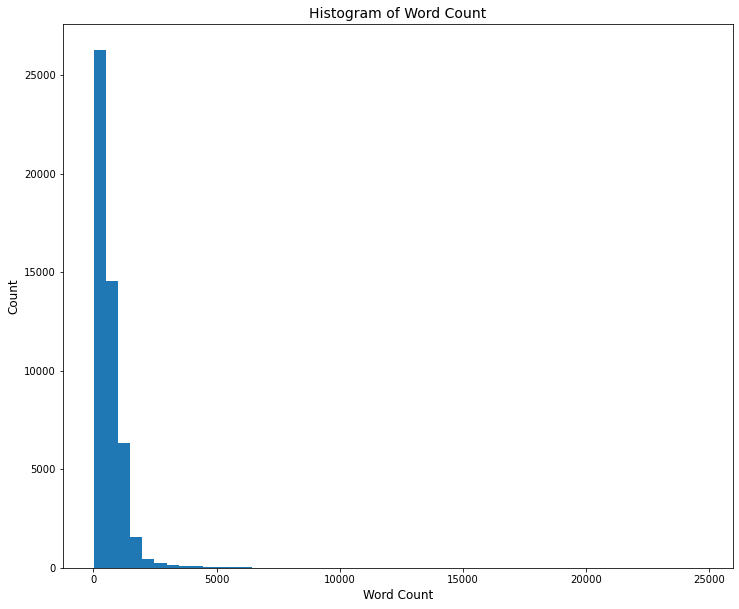

In [21]:
#Now we graph a histogram to see the likelihood of each word count

plt.figure(figsize=(12,10))
plt.hist(articles['Number of Words'], bins=50)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Word Count', fontsize=14)
plt.show()

In [22]:
#Now we will use the information we know to find the cutoff of where the outlier start
articles['Number of Words'].describe()

count    49935.000000
mean       637.122820
std        644.862963
min          1.000000
25%        276.000000
50%        469.000000
75%        833.000000
max      24735.000000
Name: Number of Words, dtype: float64

In [23]:
#Using the describe info above, we can set the IQR and the cutoff point (the end of our whisker in the boxplot)
iqr = 833-276
cutoff = 833 + 1.5*iqr


#And we can print out the articles that are above this word count AKA outliers
articles[articles['Number of Words'] > cutoff]

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,cleaned,Number of Words
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz...",danny cahill stood slightly dazed in a blizzar...,3168
11,11,17294,Can Carbon Capture Technology Prosper Under Tr...,New York Times,John Schwartz,2017-01-05,2017.0,1.0,NaN,"THOMPSONS, Tex. — Can one of the most promi...",thompsons tex can one of the most promising ...,1796
...,...,...,...,...,...,...,...,...,...,...,...,...
49941,53233,73390,All of Human Knowledge Buried in a Salt Mine,Atlantic,Richard Kemeny,2017-01-09,2017.0,1.0,NaN,Martin Kunze wants to gather a snapshot of all...,martin kunze wants to gather a snapshot of all...,1959
49947,53239,73396,Inside LAX’s New Anti-Terrorism Intelligence Unit,Atlantic,Geoff Manaugh,2017-01-09,2017.0,1.0,NaN,The car inched forward through early morning t...,the car inched forward through early morning t...,5147
49956,53248,73413,What Jeff Sessions’s Role in Prosecuting the K...,Atlantic,Adam Serwer,2017-01-09,2017.0,1.0,NaN,That gruesome case has become newly relevant w...,that gruesome case has become newly relevant w...,3658
49984,53276,73454,The Enduring Mystery of Pain Measurement,Atlantic,John Walsh,2017-01-10,2017.0,1.0,NaN,"One night in May, my wife sat up in bed and sa...",one night in may my wife sat up in bed and sai...,5149
